In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
root=r"C:\Users\LocalAdmin\Desktop\Measurement\Simon F\LER06\RF measurements"
ext="B=0.25"
#read files in the folder
directories = os.listdir(root)
#keep only the files that ends with B=0.1
direct = [f for f in directories if f.endswith(ext)]
files_list = []
for f in direct:
    folder=os.path.join(root, f)
    files = os.listdir(folder)
    #keep only the files that ends with .dat
    files = [f for f in files if f.endswith(".dat")]
    files_list.append(files[0])
#get the header of the first file
with open(os.path.join(root, direct[0], files_list[0])) as f:
    header = f.readline()
#read the files
data = np.loadtxt(os.path.join(root, direct[0], files_list[0]))
for i in range(1, len(direct)):
    data = np.vstack((data, np.loadtxt(os.path.join(root, direct[i], files_list[i]))))

create_folder = os.path.join(root, "merged_"+ext+"_")
if not os.path.exists(create_folder):
    os.makedirs(create_folder)
np.savetxt(os.path.join(create_folder, ext+".dat"), data, header=header[2:])

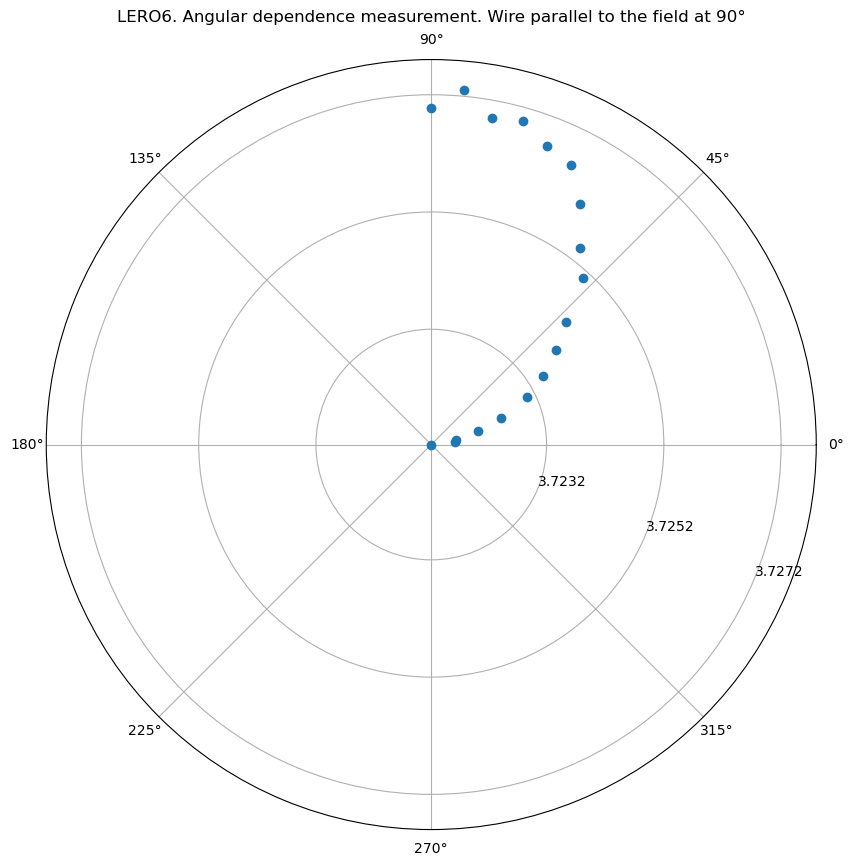

In [95]:
root=r"C:\Users\LocalAdmin\Desktop\Measurement\Simon F\LER06\RF measurements"
create_folder2="merged_B=0.1_"
create_folder1="merged_B=0.25_"
ext1="B=0.1"
ext2="B=0.25"
data=np.loadtxt(os.path.join(create_folder1, ext1),skiprows=1)
data2=np.loadtxt(os.path.join(create_folder2, ext2),skiprows=1)
r=data[:,1]/1e6
r2=data2[:,1]/1e6

r=np.abs(r-r[0])
r2=np.abs(r2-r2[-1])

theta=np.abs(np.arctan(data[:,8]/data[:,6]))
theta2=np.abs(np.arctan(data2[:,8]/data2[:,6]))
#do a polar plot r vs theta
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))
ax.plot(theta, r,'o',label="B=0.25T")
ax.plot(theta2, r2,'o',label="B=0.1T")

# Set the radial ticks to include the radial origin
#ax.set_rticks(np.round(np.arange(np.min(r), np.max(r)+0.002, 0.002),4))

#ax.set_rmin(np.min(r))
#ax.set_rmax(np.max(r2))
#ax.set_rlabel_position(-22.5)
# Show the radial grid lines
ax.grid(True)


# Set the title of the plot
ax.set_title("LERO6. Angular dependence measurement. Wire parallel to the field at 90°. \n $\Delta f$. Radial increment of 1 MHz", va='bottom')
ax.legend()
# Show the plot
plt.show()


In [ ]:
data=np.loadtxt(os.path.join(create_folder, "fitted_data"),skiprows=1)
data2=np.loadtxt("fitted_data.txt",skiprows=1)
r=data[:,1]/1e9
r2=data2[:,1]/1e9


theta=np.abs(np.arctan(data[:,8]/data[:,6]))
theta2=np.abs(np.arctan(data2[:,8]/data2[:,6]))
#do a polar plot r vs theta
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))
ax.plot(theta, r,'o',label="B=0.25T")
ax.plot(theta2, r2,'o',label="B=0.1T")

# Set the radial ticks to include the radial origin
ax.set_rticks(np.round(np.arange(np.min(r), np.max(r2)+0.002, 0.002),4))

ax.set_rmin(np.min(r)-0.005)
ax.set_rmax(np.max(r2))
#ax.set_rlabel_position(-22.5)
# Show the radial grid lines
ax.grid(True)


# Set the title of the plot
ax.set_title("LERO6. Angular dependence measurement. Wire parallel to the field at 90°\n Resonace frequency. Radial increment of 2 MHz", va='bottom')
ax.legend()
# Show the plot
plt.show()